# Linear Regression From Scratch!!

## Required Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Read the dataset

In [119]:
df = pd.read_csv("salary_data_extended.csv")

## Basic info

In [121]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   experience  20 non-null     int64
 1   salary      20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


,experience,salary
0,1,35
1,2,38
2,3,42
3,4,47
4,5,51


## Function for Linear Regression

In [123]:
def linear_regression(X, y, alpha=0.01, epochs=100):
    # Step 1: Initialize parameters
    w = 0.0
    b = 0.0
    m = len(y)  # number of examples
    cost_list = []
    
        # Step 2: Training loop
    for i in range(epochs):
                # Step 3: Make predictions
        y_pred = w * X + b
                # Step 4: Compute error
        error = y_pred - y
                # Step 5: Compute gradients
        dw = (2 / m) * np.dot(X, error)
        db = (2 / m) * np.sum(error)
                # Step 6: Update parameters
        w -= alpha * dw
        b -= alpha * db
                # Step 7: Compute and store cost (with 1/2m)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_list.append(cost)

        # Step 8: Return the learned parameters and cost history
    return w, b, cost_list 

## Lets Find Out Our "w" and "b" Values

In [125]:
# Step 1: Extract data from DataFrame
X_values = df["experience"].values
y_values = df["salary"].values

# Step 2: Call the linear regression function (Custom alpha and epochs for better outcome)
w, b, cost_list = linear_regression(X_values, y_values, alpha=0.005, epochs=3000)


# Step 3: Print learned parameters
print(f"Learned w: {w:.4f}, b: {b:.4f}")

Learned w: 5.2747, b: 25.4596


## Visualizing!

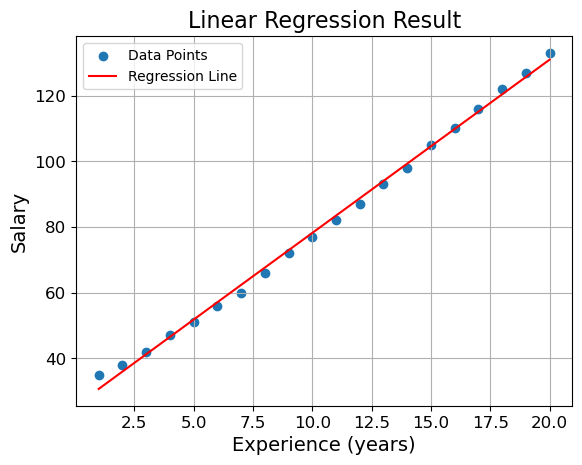

In [127]:
# Predicted line: y = wx + b
y_pred = w * X_values + b

# Plot the data points
plt.scatter(X_values, y_values, label='Data Points')

# Plot the regression line
plt.plot(X_values, y_pred, color='red', label='Regression Line')

# Axis labels
plt.xlabel('Experience (years)', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Tick sizes
plt.xticks(size=12)
plt.yticks(size=12)

# Add legend and show plot
plt.legend()
plt.title('Linear Regression Result', fontsize=16)
plt.grid(True)
plt.show()

## Linear Regression with Scikit-Learn

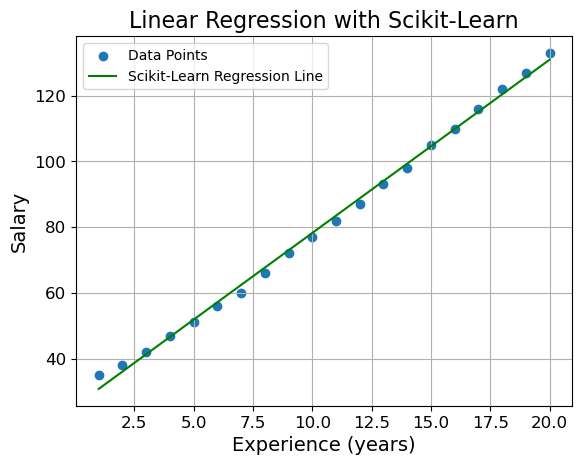

In [129]:
# Reshape X for scikit-learn (expects 2D input)
X_reshaped = X_values.reshape(-1, 1)

# Create and train the model
sk_model = LinearRegression()
sk_model.fit(X_reshaped, y_values)

# Get predictions from the scikit-learn model
y_pred_sk = sk_model.predict(X_reshaped)

import matplotlib.pyplot as plt

# Plot original data points
plt.scatter(X_values, y_values, label='Data Points')

# Plot regression line from scikit-learn
plt.plot(X_values, y_pred_sk, color='green', label='Scikit-Learn Regression Line')

# Styling
plt.xlabel('Experience (years)', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Linear Regression with Scikit-Learn', fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend()
plt.grid(True)
plt.show()